# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Load and review data

In [2]:
df = pd.read_csv("C:MachineLearning/Notebooks/data/pima-data.csv")

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features

From the metadata on the data source we have the following definition of the features.

| Feature | Description | Comments | 
|-------------|-------------|--------|
| num_preg    | number of pregnancies     |
| glucose_conc| Plasma glucose ocncentration a 2 hours in an oral glucose tolerance test      |
| diastolic_bp| Diastolic bloop pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
| insulin | -Hour serum inslin (mu U/ml) | 
| bmi | Body mass index (weight in kg/height in)^2 |
| diab_pred | Diabetes pedigree function |
| Age (years) | Age (years) |
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) | Why is our data boolean (True/False)? |

 ## Check for null values

In [6]:
df.isnull().values.any()

False

In [7]:
def plot_corr(df, size=11):
    """
    blue-cyan-yellow-red-darkred => less to more correlated
    0------------------->1
    expect a darkred line running from top left to bottom right
    
    """
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

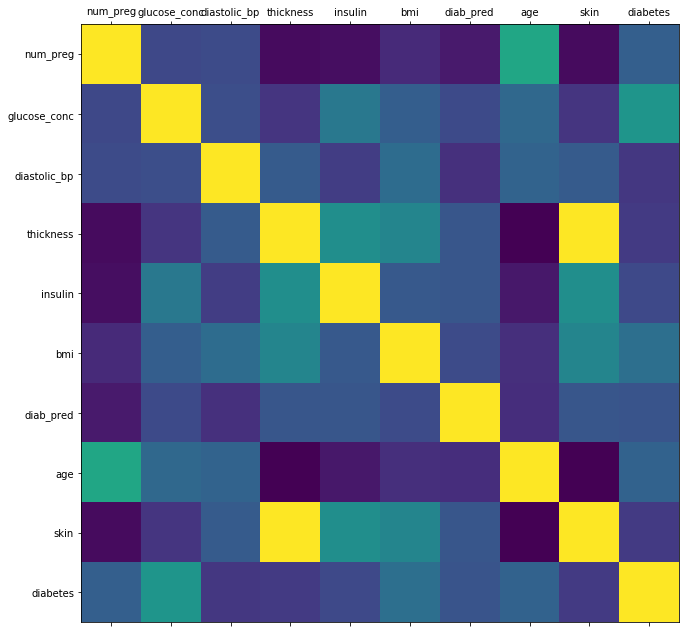

In [8]:
plot_corr(df)

In [9]:
df.corr()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
del df['skin']

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


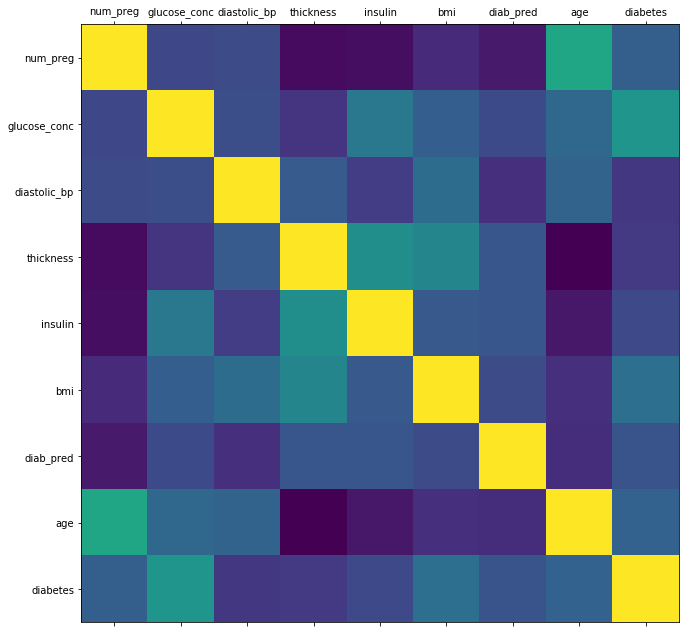

In [13]:
plot_corr(df)

## Check Data types

In [14]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1, False to 0

In [15]:
diabetes_map = {True : 1, False : 0}

In [16]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [17]:
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Cheack true/false ratio

In [18]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true / num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false / num_obs) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


### Splitting the data

70% for training, remainder for testing.

In [19]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state = 42)

# 0.3 is 30%, 42 is the answer to everything

C:\Users\KarlGall\Anaconda3\envs\jupyterEnv\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We need to check to ensure we have the desired 70% train, 30% test split of the data

In [20]:
print("{0:0.2f}% in training set".format((len(X_train) / len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test) / len(df.index)) * 100))

69.92% in training set
30.08% in test set


### Verifying predicted value was split correctly

In [21]:
print("Original True    : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]),   (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100))
print("Original False   : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]),   (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100))
print("")
print("Training True    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) *100)))
print("Training False   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) *100)))
print("")
print("Training True    : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100 )))
print("Training True    : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100 )))   

Original True    : 268 (34.90%)
Original False   : 500 (65.10%)

Training True    : 188 (35.01%)
Training False   : 349 (64.99%)

Training True    : 80 (34.63%)
Training True    : 151 (65.37%)


## Post-split Data Preparation

### Hidden Missing Values

In [22]:
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?

How many rows have unexpexted 0 values?

In [23]:
print("# rows in dataframe {0}".format(len(df)))
print("# of rows missing in glucose_conc : {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# of rows missing in diastolic_bp : {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# of rows missing in thickness : {0}".format(len(df.loc[df['thickness'] == 0])))
print("# of rows missing in insulin : {0}".format(len(df.loc[df['insulin'] == 0])))
print("# of rows missing in bmi : {0}".format(len(df.loc[df['bmi'] == 0])))
print("# of rows missing in diab_pred : {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# of rows missing in age : {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# of rows missing in glucose_conc : 5
# of rows missing in diastolic_bp : 35
# of rows missing in thickness : 227
# of rows missing in insulin : 374
# of rows missing in bmi : 11
# of rows missing in diab_pred : 0
# of rows missing in age : 0


### Impute with the mean

In [24]:
from sklearn.preprocessing import Imputer

#impute with mean all 0 reading
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

# Training Initial Algorithm - Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB


nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Preformance on Training Data

In [26]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

print("Accuracy {0:4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy 0.754190


In [32]:
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy {0:4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


Accuracy 0.735931


### Metrics 

In [33]:
print("Confusion Matrix")
# Note the use of the labels for set 1=True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0])))
print("")

print("Classification report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))


Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [38]:
rf_predict_train = rf_model.predict(X_train)

print("Accuracy: {0:4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.986965


In [39]:
rf_predict_test = rf_model.predict(X_test)

print("Accuracy: {0:4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.709957


In [42]:
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0]))
print("")

print("Classification report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

[[ 43  37]
 [ 30 121]]

Classification report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



In [45]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)



print("Accuracy: {0:4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0])))
print("")

print("Classification report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy: 0.744589
[[ 44  36]
 [ 23 128]]

Classification report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



1st max value of 0.613 occured at C=1.400


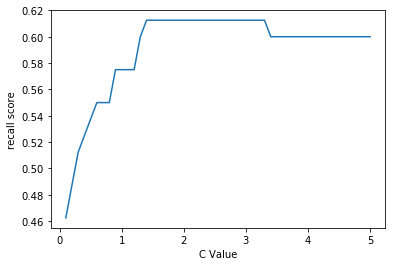

In [48]:
C_start = 0.1
C_end = 5
C_inc = 0.1
  
C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
        C_values.append(C_val)
        lr_model_loop = LogisticRegression(C=C_val, random_state = 42)
        lr_model_loop.fit(X_train, y_train.ravel())
        lr_predict_loop_test = lr_model_loop.predict(X_test)
        recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
        recall_scores.append(recall_score)
        if (recall_score > best_recall_score):
            best_recall_score = recall_score
            best_lr_predict_test = lr_predict_loop_test
            
        C_val = C_val + C_inc
        
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C Value")
plt.ylabel("recall score")        

1st max value of 0.737500 occured at  C=0.300


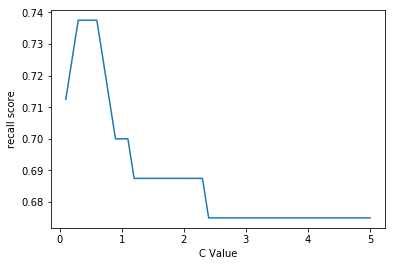

In [49]:
C_start = 0.1
C_end = 5
C_inc = 0.1
  
C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
        C_values.append(C_val)
        lr_model_loop = LogisticRegression(C=C_val,class_weight="balanced", random_state = 42)
        lr_model_loop.fit(X_train, y_train.ravel())
        lr_predict_loop_test = lr_model_loop.predict(X_test)
        recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
        recall_scores.append(recall_score)
        if (recall_score > best_recall_score):
            best_recall_score = recall_score
            best_lr_predict_test = lr_predict_loop_test
            
        C_val = C_val + C_inc
      
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:3f} occured at  C={1:.3f}".format(best_recall_score, best_score_C_val))
        
%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C Value")
plt.ylabel("recall score") 

In [67]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")

print("Classification report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.714286
[[ 59  21]
 [ 45 106]]

Classification report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231

0.7375


## LogisticRegressionCV

In [68]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [69]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy: {0:4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0]))
print("")

print("Classification report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.683983
[[ 51  29]
 [ 44 107]]

Classification report
             precision    recall  f1-score   support

          1       0.54      0.64      0.58        80
          0       0.79      0.71      0.75       151

avg / total       0.70      0.68      0.69       231

